<a href="https://colab.research.google.com/github/fax117/machine_learning_practices/blob/main/examenes/Examen_Parcial_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 2, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name:</h4>
<h4>Student ID:</h4>

# 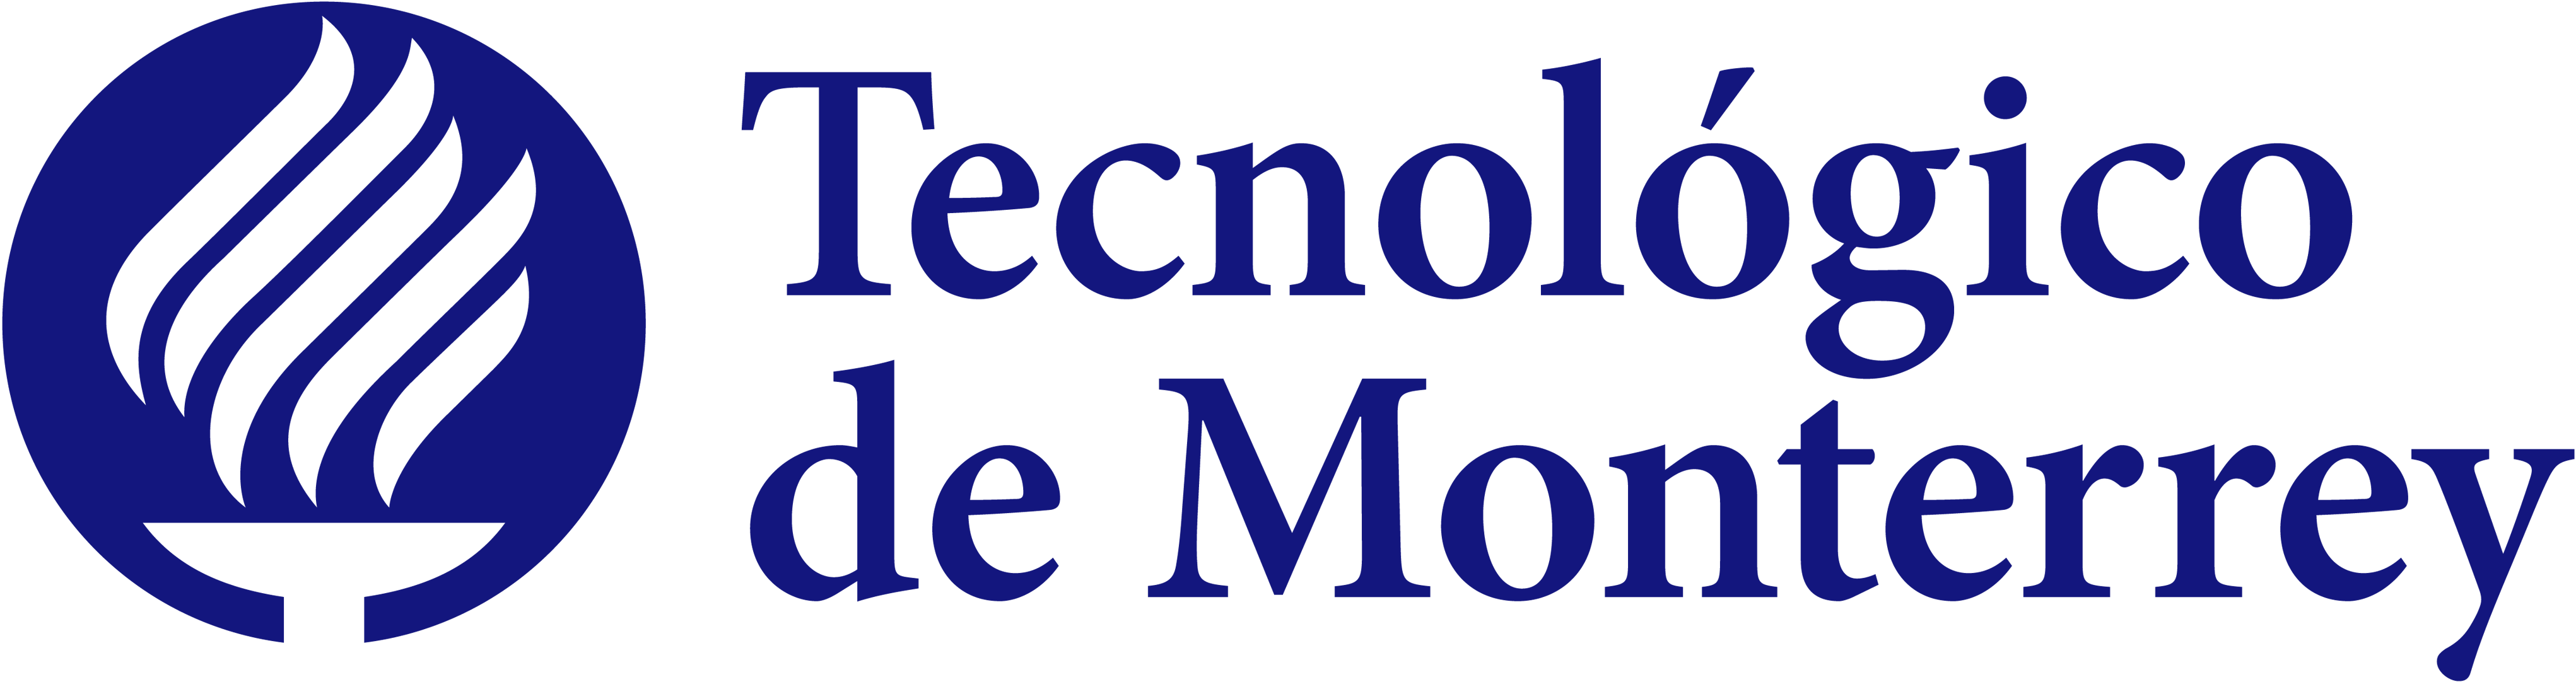

#Nombres:
### Fabricio Andre Fuentes Fuentes A0133852
### José Sebastián Reyes López    A01655218
### Luis Carlos Ordoñez           A01653435
### Pamela Arias De la Luz A01655238

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

test_df = pd.read_csv('https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Examen_Parcial_2/data/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Examen_Parcial_2/data/train.csv')
train_df.info()
print('_'*40)
test_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allen, Mr. William Henry",male,347082,B96 B98,S
freq,1,577,7,4,644


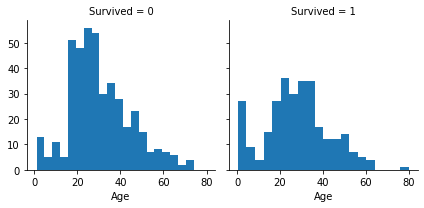

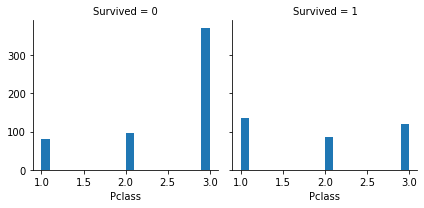

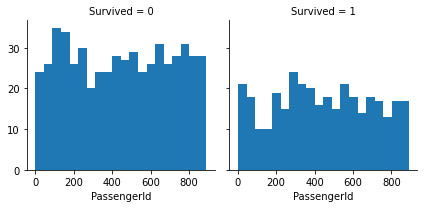

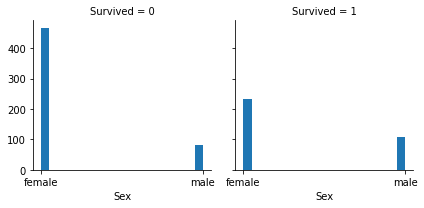

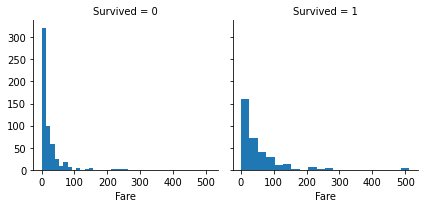

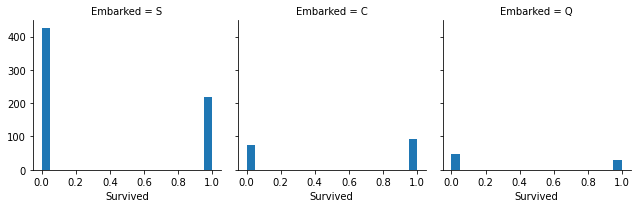

In [ ]:
#Debido a que Cabin tiene tan poca infromación agregar los datos faltantes alteraría en sobremanera la información del dataframe 
train_df=train_df.drop('Cabin',axis=1)
test_df=test_df.drop('Cabin',axis=1)
#De igual froma con Ticket, pues tiene un porcentaje de repetidos considerable además de que no ofrece infromación relevante
train_df=train_df.drop('Ticket',axis=1)
test_df=test_df.drop('Ticket',axis=1)
#Debido a los pocos valores faltantes en Embarked, se compensarán con el valor más frecuente que además tiene mucha presencia por lo que no corromperá los datos
Embarked_train_freq = train_df.Embarked.dropna().mode()[0]
Embarked_test_freq = test_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(Embarked_train_freq)
test_df['Embarked'] = test_df['Embarked'].fillna(Embarked_test_freq)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Pclass', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'PassengerId', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Sex', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Fare', bins=20)
g1 = sns.FacetGrid(train_df, col='Embarked')
g1.map(plt.hist, 'Survived', bins=20)

In [ ]:
#Se puede observar que la variable PassengerId no presenta una clara relación entre la supervivencia y la variable por lo que se descartará
train_df=train_df.drop('PassengerId',axis=1)
test_df=test_df.drop('PassengerId',axis=1)
#Realizamos one hot encoding a las variables de Sex y Embarked
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'Q': 1, 'C': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'Q': 1, 'C': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [ ]:
#Extraemos los titulos de los nombres
combine=[train_df,test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,Rev
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,0,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,Mr


In [ ]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
#Se tratan para englobar en one hot encoding los titulos en aquellos más repressentativos y los que son sinónimos
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].map( {'Miss': 0, 'Mrs': 1, 'Master': 2, 'Mr': 3, 'Rare': 4} )
train_df=train_df.drop('Name',axis=1)
test_df=test_df.drop('Name',axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,3


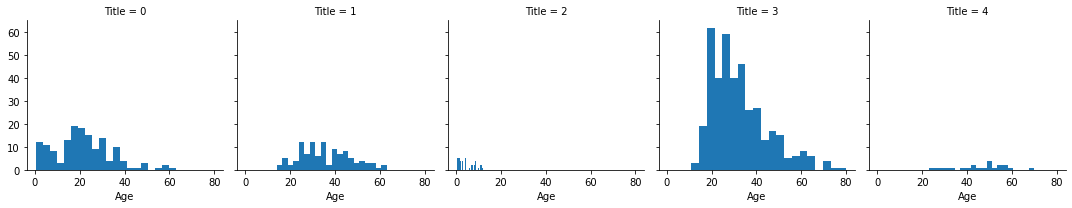

In [ ]:
#Puede que exista una realción directa entre los titulos en los nombres y las edades
g1 = sns.FacetGrid(train_df, col='Title')
g1.map(plt.hist, 'Age', bins=20)

In [ ]:
#Como se observa existe una relación entre el título y la edad, por ello los datos faltantes de edad seran concorde a las variable título
combine=[train_df,test_df]
for dataset in combine:
  guess_ages=[0,0,0,0,0]
  for i in range(0,5):
    guess_df = dataset[(dataset['Title'] == i)]['Age'].dropna()
    age_guess = guess_df.median()
    guess_ages[i] = int( age_guess/0.5 + 0.5 ) * 0.5
  for i in range(0,5):
    dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i),'Age'] = guess_ages[i]
  dataset['Age'] = dataset['Age'].astype(int)
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64 

In [ ]:
#Se observan aún valores faltantes en Fare así que se procede a completar
for dataset in combine:
  dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64 

In [ ]:
#Tratamiento de variables con mayor rango
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 10.0]",0.588235
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.310881
3,"(30.0, 40.0]",0.482558
4,"(40.0, 50.0]",0.388235
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7
train_df=train_df.drop('AgeBand',axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,0,3
1,1,1,1,3,1,0,71.2833,2,1
2,1,3,1,2,0,0,7.9250,0,0
3,1,1,1,3,1,0,53.1000,0,1
4,0,3,0,3,0,0,8.0500,0,3


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
combine = [train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,0,0,3
1,1,1,1,3,1,0,3,2,1
2,1,3,1,2,0,0,1,0,0
3,1,1,1,3,1,0,3,0,1
4,0,3,0,3,0,0,1,0,3
5,0,3,0,2,0,0,1,1,3
6,0,1,0,5,0,0,3,0,3
7,0,3,0,0,3,1,2,0,2
8,1,3,1,2,0,2,1,0,1
9,1,2,1,1,1,0,2,2,1


In [ ]:
#Creación de variables con las variables existentes
combine = [train_df, test_df]
for dataset in combine:
  dataset['WithRelatives']=0
  dataset.loc[(dataset.SibSp + dataset.Parch)>0,'WithRelatives']=1
train_df = train_df.drop(['SibSp','Parch'], axis=1) 
test_df = test_df.drop(['SibSp','Parch'], axis=1) 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,WithRelatives
0,0,3,0,2,0,0,3,1
1,1,1,1,3,3,2,1,1
2,1,3,1,2,1,0,0,0
3,1,1,1,3,3,0,1,1
4,0,3,0,3,1,0,3,0


In [ ]:
combine = [train_df, test_df]
for dataset in combine:
  dataset['Age*WithRelatives']=dataset.Age*(dataset.WithRelatives+1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,WithRelatives,Age*WithRelatives
0,0,3,0,2,0,0,3,1,4
1,1,1,1,3,3,2,1,1,6
2,1,3,1,2,1,0,0,0,2
3,1,1,1,3,3,0,1,1,6
4,0,3,0,3,1,0,3,0,3


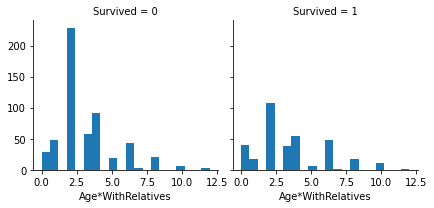

In [ ]:
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Age*WithRelatives', bins=20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV


X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

best_log_cv=0
for i, score in enumerate(cross_validate(logreg, X_train,Y_train, cv=10)["test_score"]):
    if score > best_log_cv:
      best_log_cv=score

pipeline = make_pipeline(MinMaxScaler(),SelectKBest(f_classif),LogisticRegression())
param_grid = {
    'selectkbest__k': [5,6,7,8],
    'logisticregression__C':[1,2,3,4],
    'logisticregression__max_iter':[100,200,300]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_log=gridsearch.best_score_
print(' Resultado apriori:',acc_log,'\n','Resultado con CV:', (best_log_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_log*100).round(2))


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Resultado apriori: 79.12 
 Resultado con CV: 82.02 
 Resultado con GridSearch: 78.9


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    5.8s finished


In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

best_linear_svc_cv=0
for i, score in enumerate(cross_validate(linear_svc, X_train,Y_train, cv=10)["test_score"]):
    if score > best_linear_svc_cv:
      best_linear_svc_cv=score

pipeline = make_pipeline(MinMaxScaler(),SelectKBest(f_classif),LinearSVC())
param_grid = {
    'selectkbest__k': [5,6,7,8],
    'linearsvc__C':[1,2,3,4],
    'linearsvc__intercept_scaling':[1,2,3],
    'linearsvc__max_iter':[5000]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_linear_svc=gridsearch.best_score_
print(' Resultado apriori:',acc_linear_svc,'\n','Resultado con CV:', (best_linear_svc_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_linear_svc*100).round(2))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Fitting 10 folds for each of 48 candidates, totalling 480 fits
 Resultado apriori: 78.56 
 Resultado con CV: 82.02 
 Resultado con GridSearch: 78.9


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   17.2s finished


In [ ]:
# K-Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

best_knn_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_knn_cv:
      best_knn_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),KNeighborsClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'kneighborsclassifier__n_neighbors':[4,5,6,7,8,9],
    'kneighborsclassifier__p':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch.best_score_
gridsearch_knn=gridsearch.best_score_

print(' Resultado apriori:',acc_knn,'\n','Resultado con CV:', (best_knn_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_knn*100).round(2))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Resultado apriori: 84.62 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 82.16


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    9.7s finished


In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

best_decision_tree_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_decision_tree_cv:
      best_decision_tree_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),DecisionTreeClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'decisiontreeclassifier__criterion':["gini", "entropy"],
    'decisiontreeclassifier__min_samples_split':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_decision_tree=gridsearch.best_score_

print(' Resultado apriori:',acc_decision_tree,'\n','Resultado con CV:', (best_decision_tree_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_decision_tree*100).round(2))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Resultado apriori: 87.88 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 80.48


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.4s finished


In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

best_random_forest_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_random_forest_cv:
      best_random_forest_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),RandomForestClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'randomforestclassifier__n_estimators':[100,200,300],
    'randomforestclassifier__min_samples_split':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_random_forest=gridsearch.best_score_

print(' Resultado apriori:',acc_random_forest,'\n','Resultado con CV:', (best_random_forest_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_random_forest*100).round(2))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.0min finished


 Resultado apriori: 87.88 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 81.38


In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree','Linear SVM'],
    'Apriori_Score': [ acc_knn, acc_log,  acc_random_forest, acc_decision_tree, acc_linear_svc ],
    'CV Score': [(best_log_cv*100).round(2),(best_linear_svc_cv*100).round(2),(best_knn_cv*100).round(2),(best_decision_tree_cv*100).round(2),(best_random_forest_cv*100).round(2)],
    'GridSearch Score': [(gridsearch_log*100).round(2),(gridsearch_linear_svc*100).round(2),(gridsearch_knn*100).round(2),(gridsearch_decision_tree*100).round(2),(gridsearch_random_forest*100).round(2)]})
models.sort_values(by='Apriori_Score', ascending=False)

,Model,Apriori_Score,CV Score,GridSearch Score
2,Random Forest,87.88,84.27,82.16
3,Decision Tree,87.88,84.27,80.48
0,KNN,84.62,82.02,78.90
1,Logistic Regression,79.12,82.02,78.90
4,Linear SVM,78.56,84.27,81.38


In [ ]:
#No sé si la parte del GridSearch esté bien hecha porque en general los resultados empeoraron 
#Y faltarian unas conclusiones de esta parte creo

##Quiero creer que el score de gridsearch es lo que seria una media de los resultados, y como lo hace por folds es posible que sea menor a el resto por cuestiones de ciertos folds teniendo
##resultados muy bajos. La verdad no se bien como funciona todo esto, lo que supongo es que como busca por hiperparametros, hay ciertas combinaciones que de plano no funcionan muy bien y es
##de ahi que baja el promedio, pero puede que no signifique que sea peor que el resto. Yo lo interpreto como que es mas exhaustivo y por lo mismo es un poco más bajo que el resto.

---
---

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)

In [ ]:
#Aquí sus códigos (añadan las líneas necesarias)